<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Machine Learning Term-3 Project On Breast Cancer Dataset

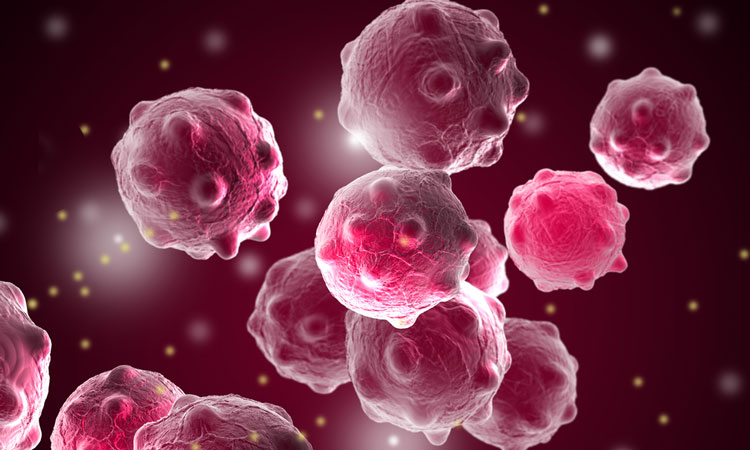

__Breast cancer (BC)__ is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. The correct diagnosis of BC and classification of patients into __malignant or benign__ groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, __machine learning (ML)__ is widely recognized as the methodology of choice in __BC pattern classification and forecast modelling__.

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Install and import python packages](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>  
- 2. [Data Description and Pre-profiling](#section2)</br>
    - 2.1 [Describe Data](#section201)<br/>
    - 2.2 [Data profiling before processing](#section202)<br/>
- 3. [Data Exploration](#section3)</br>
- 4. [Exploratory Data Analysis](#section4)</br>
    - 4.1 [Correlation Using Heatmap](#section401)<br/>
    - 4.2 [Distplot For Class](#section402)<br/>
    - 4.3 [Boxplot to show correlation between uniformity of cell shape and unformity of cell size](#section403)<br/>
    - 4.4 [Unformity of cell size and Class relation](#section404)<br/>
    - 4.5 [Unformity of cell shape and Class relation](#section405)<br/>
    - 4.6 [Clump Thickness](#section406)<br/>
    - 4.7 [Bland Chromatin with Uniformity of Cell Size Correlation](#section407)<br/>
    - 4.8 [Hist plot for each correlated parameter](#section408)<br/>
- 5. [Data Train/Test Split](#section5)</br>
    - 5.1 [Feature Scaling](#section501)<br/>
- 6. [Training A Model](#section6)</br>     
- 7. [Conclusion](#section7)<br/>

<a id=section1></a>
## 1. Problem Statement

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.

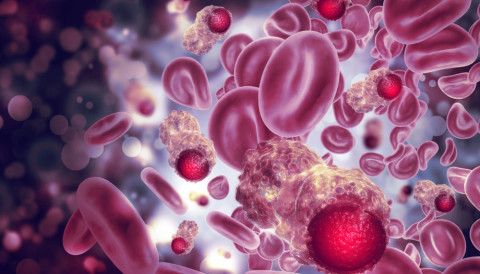

To achieve that, we have decided to use the data from https://archive.ics.uci.edu/ml/index.php site. The data is given in the file **Breast_Cancer.csv**.

<a id=section101></a>
### 1.1 Install and import python packages

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report, recall_score, auc,roc_auc_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

<a id=section102></a>
### 1.2 Data Source And Data Set

In [73]:
cancer_dt = pd.read_csv('https://raw.githubusercontent.com/RinaMhatre/DataScience-Repository/master/Breast_Cancer_csv.csv')
cancer_dt.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [74]:
cancer_dt.shape

(699, 11)

In [75]:
cancer_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


- ```info and shape``` functions gives us the following insights into the data:

  - There are a total of **699 samples (rows)** and **11 columns** in the dataset.
  
  - There are **10 columns** with a **numeric** datatype and **1 column** with an **object** datatype.

<a id=section2></a>
## 2. Data Description and Pre-profiling


__Data profiling is the process of reviewing source data, understanding structure, content and corrrelation between variables.__

Data profiling involves:

- Collecting descriptive statistics like min, max, count and sum.
- Collecting data types, length and recurring patterns.
- Tagging data with keywords, descriptions or categories.
- Performing data quality assessment, risk of performing joins on the data.
- Discovering metadata and assessing its accuracy.
- Identifying distributions, key candidates, foreign-key candidates, functional dependencies, embedded value dependencies, and - performing inter-table analysis.


<a id=section201></a>
### 2.1 Describe Data

In [76]:
cancer_dt.describe()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


- ```describe``` function gives us the following insights into the data:
  - All data size is distributed between __1 to 10 minimum value is 1 and maximum is 10__ for all columns approximately. 
  
  - The standerd deviation varies for each column. 
 
 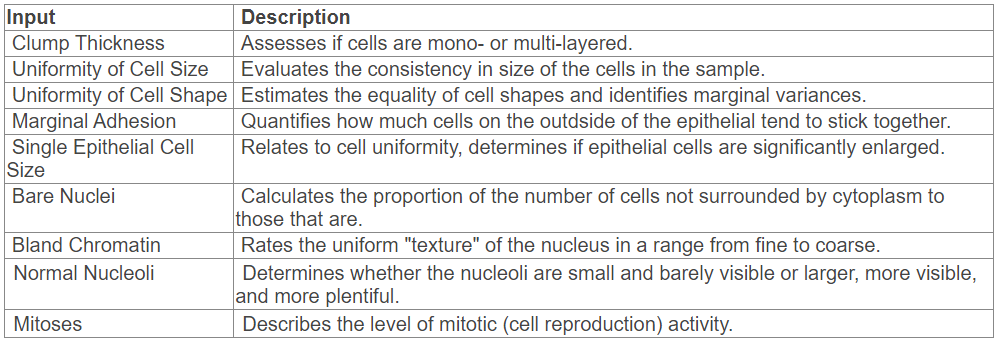

<a id=section202></a>
### 2.2 Pandas Profiling before Data Preprocessing
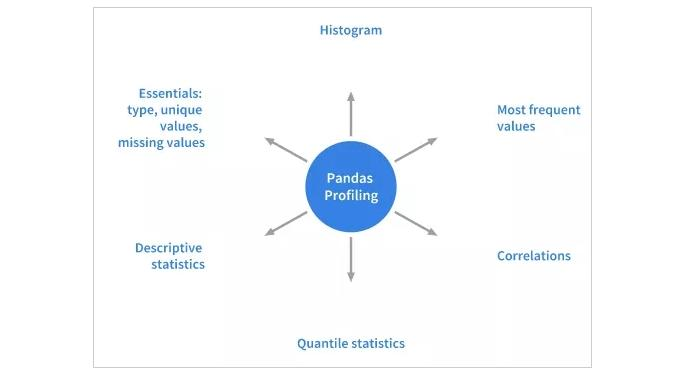



- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __BreastCancer_Data_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 

In [77]:
# Performing pandas profiling before data preparation.
# Saving the output as BreastCancer_Data_before_preprocessing.html

# To output pandas profiling report to an external html file.

profile = cancer_dt.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="BreastCancer_Data_before_preprocessing.html")

A Jupyter widget could not be displayed because the widget state could not be found. This could happen if the kernel storing the widget is no longer available, or if the widget state was not saved in the notebook. You may be able to create the widget by running the appropriate cells.

A Jupyter widget could not be displayed because the widget state could not be found. This could happen if the kernel storing the widget is no longer available, or if the widget state was not saved in the notebook. You may be able to create the widget by running the appropriate cells.

A Jupyter widget could not be displayed because the widget state could not be found. This could happen if the kernel storing the widget is no longer available, or if the widget state was not saved in the notebook. You may be able to create the widget by running the appropriate cells.

A Jupyter widget could not be displayed because the widget state could not be found. This could happen if the kernel storing the widget is no longer available, or if the widget state was not saved in the notebook. You may be able to create the widget by running the appropriate cells.


**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables	 : 11
- Number of observations : 699
- Missing cells	         : 0


__Variables types__: 
- Categorical :	2
- Numerical	  : 9


__Distinct count__: 645

<a id=section3></a>
## 3.Data Exploration

Since the dataset is clean and not having any missing values, we don't need to perform data processing.

In [78]:
cancer_dt.isnull().sum()

Sample_code_number             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [79]:
cancer_dt.drop("Bare_Nuclei",axis = 1,inplace = True)
cancer_dt.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2


Bare nuclei column has no significant value in dataset hence we can drop that column.

<a id=section4></a>
## 4.Exploratory Data Analysis

<a id=section401></a>
### 4.1 Correlation Using HeatMap

Text(0.5, 1.0, 'Heatmap To Show Correlation Of Breast Cancer Dataset')

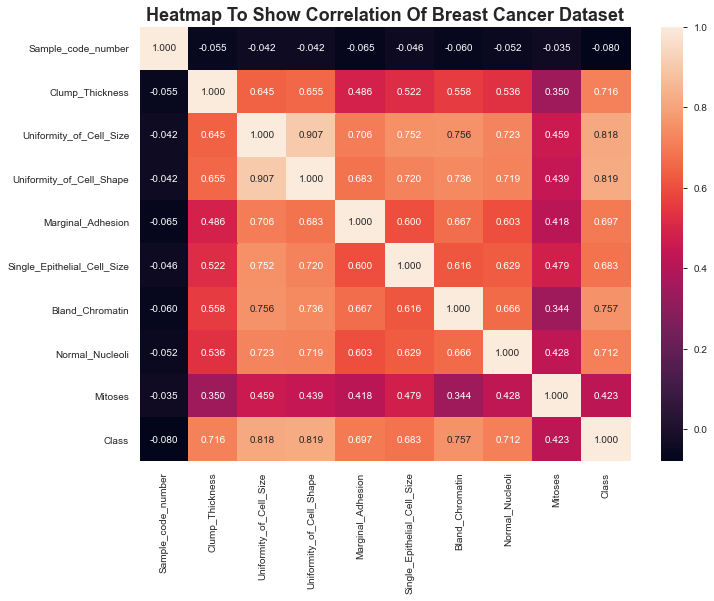

In [80]:
plt.figure(figsize=(11,8))
sns.heatmap(cancer_dt.corr(), annot=True, fmt=".3f")
plt.title("Heatmap To Show Correlation Of Breast Cancer Dataset", fontsize=18, fontweight = "bold")

#### Observations:

1) Heatmap shows correlation between each variable present in dataset. As per above heatmap darkest colour shows negative correlation between two variable and lighter colour shows positive correlation between two variable.

2) Uniformity of cell shape and Uniformity of cell size is highly correlated.

3) Bland cromatine and Uniformity of cell size is showing some correlation.

<a id=section402></a>
### 4.2  Distplot For Class

Explore the distribution of __malignant and benign__ class through the dataset

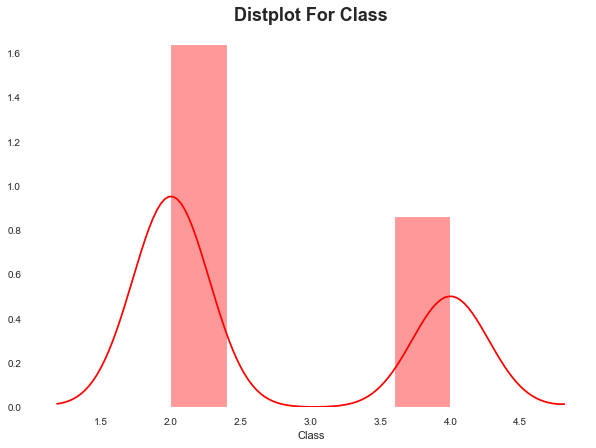

In [81]:
plt.rcParams['figure.figsize']=(10,7)
sns.distplot(cancer_dt["Class"], color="Red")
plt.title("Distplot For Class",fontsize=18, fontweight = "bold")
plt.show()

#### Observation:
A tumor is an abnormal lump or growth of cells. When the cells in the tumor are normal, it is benign. Something just went wrong, and they overgrew and produced a lump. When the cells are abnormal and can grow uncontrollably, they are cancerous cells, and the tumor is malignant.

Here distplot shows spreas of data

<a id=section403></a>
### 4.3  Boxplot to show correlation between uniformity of cell shape and unformity of cell size

The cancer cell shape and its size are important aspects while studying breast cancer dataset. In medical study it is important because the size of cancer infected cells are different than healthy cells.

Text(0.5, 1.0, 'Boxplot To Show Correlation Of Cell Shape & Size')

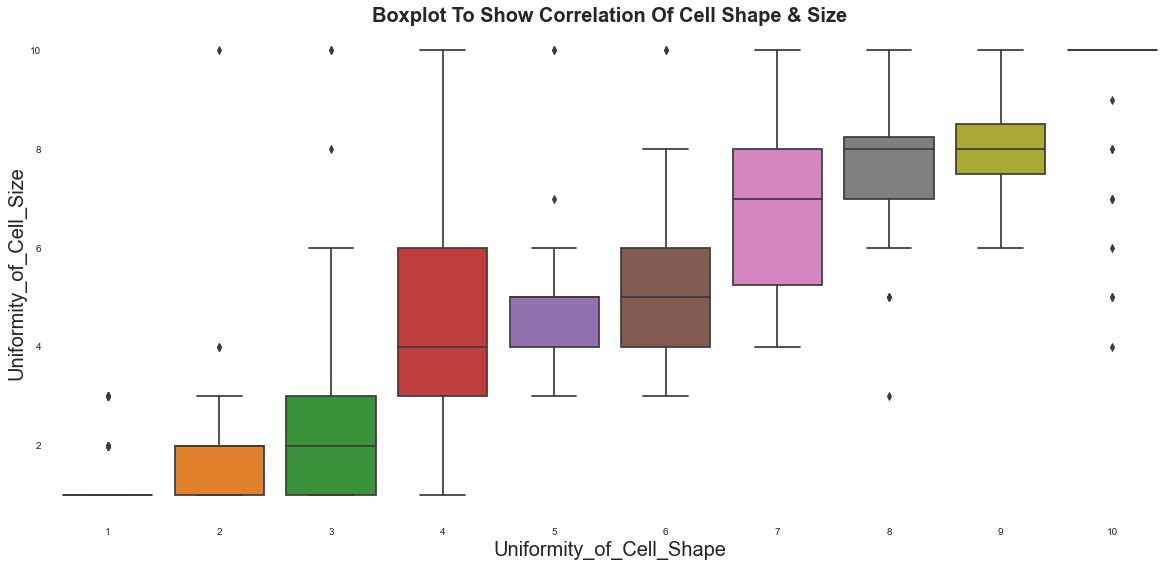

In [82]:
plt.rcParams['figure.figsize']=(20,9)
a = sns.boxplot(x="Uniformity_of_Cell_Shape", y="Uniformity_of_Cell_Size",data=cancer_dt)
a.set_xlabel("Uniformity_of_Cell_Shape", fontsize=20)
a.set_ylabel("Uniformity_of_Cell_Size", fontsize=20)
a.axes.set_title("Boxplot To Show Correlation Of Cell Shape & Size",fontsize=20, fontweight = "bold")

#### Observation:
All breast cancers start in the breast, so they are alike in some ways.

Breast cancers differ in other ways. They can be non-invasive or invasive. Tumor cells can vary in location (milk ducts or lobules) and how they look under a microscope. 

From size and shape of the cell it can be helpful to classify wether cancer is non-invasive or invasive.

<a id=section404></a>
### 4.4  Unformity of cell size and Class relation

Text(0.5, 1.0, 'Uniformity_of_Cell_Size with Class relation')

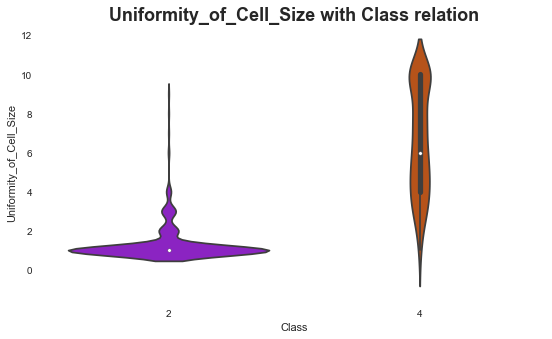

In [83]:
plt.rcParams['figure.figsize']=(9,5)
ax = sns.violinplot(x="Class", y="Uniformity_of_Cell_Size", palette="gnuplot", data=cancer_dt)
plt.xlabel("Class")
plt.ylabel("Uniformity_of_Cell_Size")
plt.title("Uniformity_of_Cell_Size with Class relation", fontsize=18, fontweight = "bold")

#### Observation:

In Benign type of cancer cell size is smaller, for Mallignant type of cancer cell size is larger.

<a id=section405></a>
### 4.5  Unformity of cell shape and Class relation

Text(0.5, 1.0, 'Uniformity_of_Cell_Shape with Class relation')

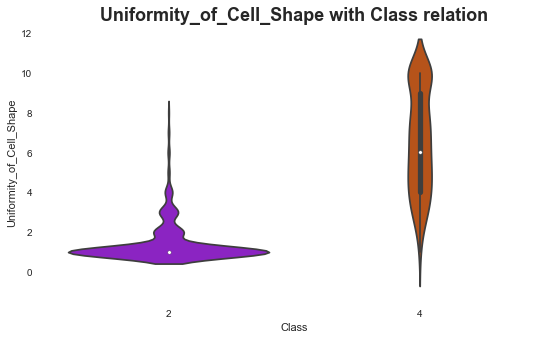

In [84]:
plt.rcParams['figure.figsize']=(9,5)
ax = sns.violinplot(x="Class", y="Uniformity_of_Cell_Shape", palette="gnuplot", data=cancer_dt)
plt.xlabel("Class")
plt.ylabel("Uniformity_of_Cell_Shape")
plt.title("Uniformity_of_Cell_Shape with Class relation", fontsize=18, fontweight = "bold")

#### Observation:

In Benign type of cancer cell shape is smaller, for Mallignant type of cancer cell shape is larger.

<a id=section406></a>
### 4.6  Clump Thickness

Text(0.5, 1.0, 'Scatter plot for Clump thickness, Uniformity of cell size and shape for class')

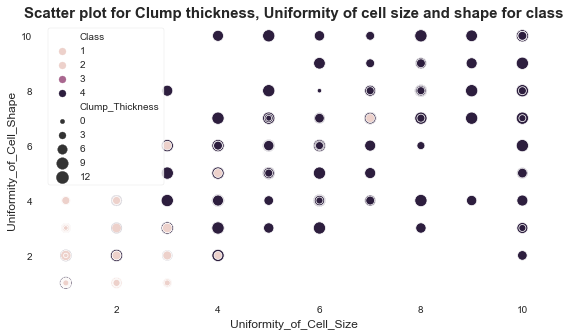

In [85]:
plt.rcParams['figure.figsize']=(9,5)
a = sns.scatterplot(x="Uniformity_of_Cell_Size", y="Uniformity_of_Cell_Shape", size="Clump_Thickness", hue="Class", data=cancer_dt, sizes=(20, 150))
a.set_xlabel("Uniformity_of_Cell_Size", fontsize=12)
a.set_ylabel("Uniformity_of_Cell_Shape", fontsize=12)
a.axes.set_title("Scatter plot for Clump thickness, Uniformity of cell size and shape for class",fontsize=15, fontweight = "bold")

#### Observation:

The clump thickness abruptly increases in malignant type.

<a id=section407></a>
### 4.7  Bland Chromatin with Uniformity of Cell Size Correlation	

Text(0.5, 1.0, 'Bland Chromatin And Cell Size Relation')

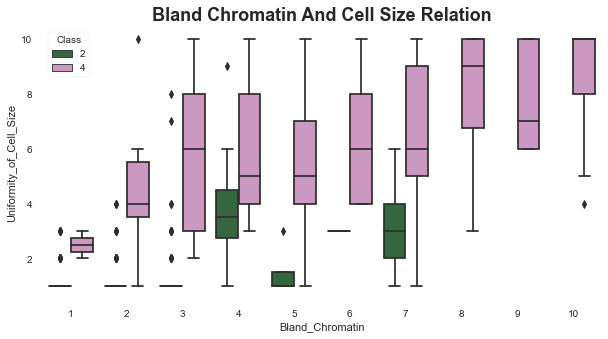

In [86]:
plt.rcParams['figure.figsize']=(10,5)
sns.boxplot(x="Bland_Chromatin", y="Uniformity_of_Cell_Size", hue="Class", palette="cubehelix", data=cancer_dt)
plt.title("Bland Chromatin And Cell Size Relation", fontsize=18, fontweight="bold")

#### Observation:
Bland cromatin indicates cell size is non uniform for cancer 

<a id=section408></a>
### 4.8 Hist plot for each correlated parameter

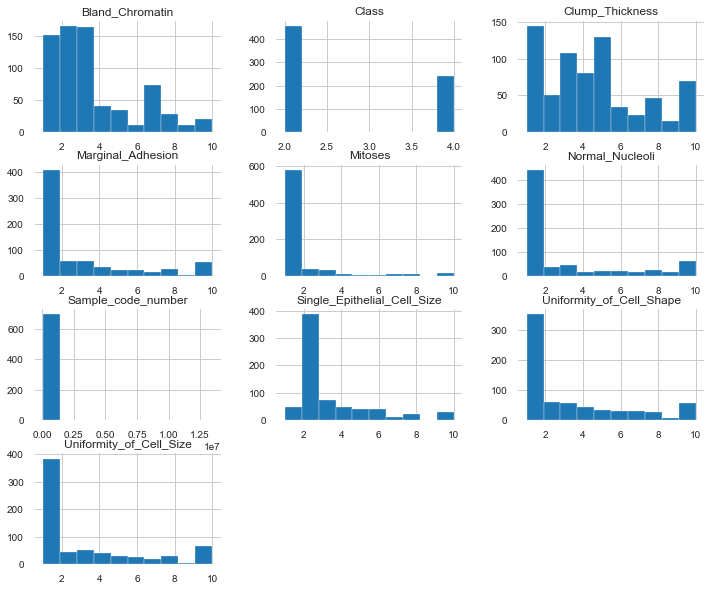

In [87]:
cancer_dt.hist(figsize = (12,10))
plt.show()

#### Observation:
clump thickness is evenly distributed to some extent. All other variables are skewed to the right.

<a id=section5></a>
## 5.Data Train-Test-Split
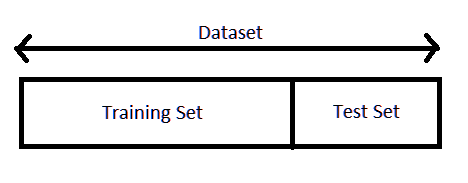

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

In [88]:
X = cancer_dt.iloc[:, :31].values
Y = cancer_dt.Class
print(Y)

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

<a id=section501></a>
### 5.1 Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
print(X_train)

[[ 0.65934756  1.29893022  2.21279217 ... -0.29552173 -0.33390732
   1.39420953]
 [ 0.02694798 -0.4931694  -0.68596557 ... -0.61546674 -0.33390732
  -0.7172523 ]
 [ 0.52492521  1.29893022  2.21279217 ...  1.62414835  3.28610862
   1.39420953]
 ...
 [ 0.36515261 -0.13474948 -0.68596557 ... -0.61546674 -0.33390732
  -0.7172523 ]
 [ 0.60718008  0.22367045 -0.68596557 ... -0.61546674 -0.33390732
  -0.7172523 ]
 [-1.40293691 -1.21000925 -0.68596557 ... -0.61546674 -0.33390732
  -0.7172523 ]]


In [92]:
print(X_test)

[[ 0.54627649 -0.13474948 -0.68596557 ... -0.61546674 -0.33390732
  -0.7172523 ]
 [-0.46141624 -0.13474948 -0.36388138 ... -0.61546674 -0.33390732
  -0.7172523 ]
 [ 0.07790942  0.58209037  0.92445539 ...  1.62414835 -0.33390732
  -0.7172523 ]
 ...
 [ 0.68454734  0.22367045 -0.04179719 ... -0.61546674 -0.33390732
  -0.7172523 ]
 [ 0.36036844 -1.21000925 -0.68596557 ... -0.61546674 -0.33390732
  -0.7172523 ]
 [ 0.31577571 -0.13474948 -0.68596557 ... -0.29552173 -0.33390732
  -0.7172523 ]]


In [93]:
X_train.shape

(524, 10)

In [94]:
Y_train.shape

(524,)

#### Model Evaluation Using accuracy classification score

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

In [95]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
Y_pred_train = logreg.predict(X_train)  
print(Y_pred_train)

[4 2 4 4 2 4 2 4 2 2 4 4 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 4
 4 2 4 4 4 2 4 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 4 2 2 4 2 2 2 2 2
 2 2 2 2 2 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 2 4 2 4 4 2 2 2 4 4 4 4 2 4
 2 2 2 4 4 4 2 2 4 2 2 2 4 4 2 4 2 4 2 2 2 2 2 4 4 2 2 4 2 4 2 4 4 2 4 2 2
 4 2 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 4 4 4 4 2 4 2 2 2 2 2 4 4 2 4 4 4 2
 2 2 4 2 4 4 2 4 2 2 2 2 2 4 2 4 2 2 4 4 2 2 2 4 4 4 2 2 2 2 4 2 4 2 2 2 2
 2 2 2 2 2 4 4 4 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 2 2 2 4 4 2 4 2 2 2 2 4 2 4
 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 2 4 2 2 2 2 2 4 4 2 2 4 2 2 4 4 2 4
 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 2 2 2 2
 2 4 4 2 2 4 2 2 2 2 4 2 2 4 4 2 2 4 2 2 2 4 2 2 4 2 4 2 2 4 4 4 2 2 2 4 2
 2 2 2 4 2 2 2 2 4 2 4 2 4 4 2 2 2 4 4 4 2 2 2 2 4 2 2 4 2 4 2 4 2 2 4 2 2
 2 2 2 2 4 2 2 2 4 4 4 4 4 2 2 2 2 4 4 4 4 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2
 2 2 2 2 4 4 2 2 4 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 4 2
 4 4 4 2 4 2 2 4 2 2 2 2 

In [97]:
Y_pred_test = logreg.predict(X_test)  
print(Y_pred_test)

[2 2 2 2 4 2 4 2 4 4 2 2 4 4 4 2 2 4 4 2 4 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2
 4 2 2 2 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 4 2 2 2 4 2 4 4 2 4 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 2 4
 4 4 2 2 2 2 2 4 4 4 4 2 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2 4 4 2 2 2 2 2 4
 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 4 2 2 2 2]


In [98]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_test))


Accuracy: 1.0


<a id=section6></a>
## 6.Training A Model
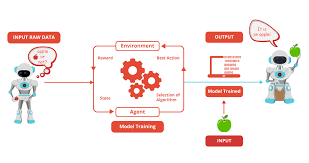

The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from. The term ML model refers to the model artifact that is created by the training process.

The training data must contain the correct answer, which is known as a target or target attribute. The learning algorithm finds patterns in the training data that map the input data attributes to the target (the answer that you want to predict), and it outputs an ML model that captures these patterns.

We have different types of algorithms which we learnt in Machine intermediate Learning program :-
1. PCA
2. K Nearest Neighbor
3. Support Vector Machines
4. K means clustering
5. Naïve Bayes
6. Time Series

Lets start applying the algorithms :
We will use sklearn library to import all the methods of classification algorithms.


#### PCA (Principal component analysis)
__Principal component analysis (PCA)__ is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

In [99]:
#Using PCA Method find principle components
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_train)
print(principalComponents)

[[ 3.12452336  0.79603829 -1.00810218 ...  0.31807417 -0.11596872
   1.23320035]
 [-1.68942102 -0.0077241   0.04165421 ... -0.1584947   0.08203491
  -0.19131824]
 [ 5.30914628  0.67729772  2.33860129 ... -0.56991597  0.26339192
   0.02604205]
 ...
 [-1.8524864   0.33427973  0.10000563 ...  0.09110763  0.08052575
   0.05939614]
 [-1.61193432  0.598723   -0.07763079 ...  0.18292899  0.22593973
   0.02477278]
 [-2.13112466 -1.47479922  0.34947759 ... -0.15296682 -0.16543855
   0.07443575]]


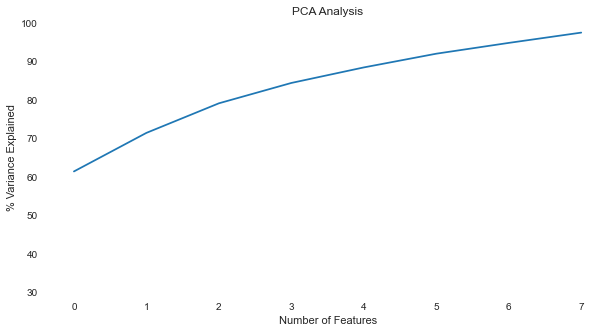

In [100]:
pca = PCA(.95).fit(X_train)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [101]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

8 components explain 95% of the variation in data


In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [105]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [106]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.63011834]


In [123]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [124]:
print("PCA Classification Report:")
print(classification_report(Y_test, y_pred))

PCA Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       112
           4       0.95      0.97      0.96        63

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



#### Observation:
From Breast cancer dataset 8 components are contain 95% of data.

#### KNN ( k-nearest neighbors)
__KNN__ can be used for both classification and regression predictive problems. However, it is more __widely used in classification__ problems in the industry. To evaluate any technique we generally look at 3 important aspects:

1. Ease to interpret output

2. Calculation time

3. Predictive Power

In [107]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

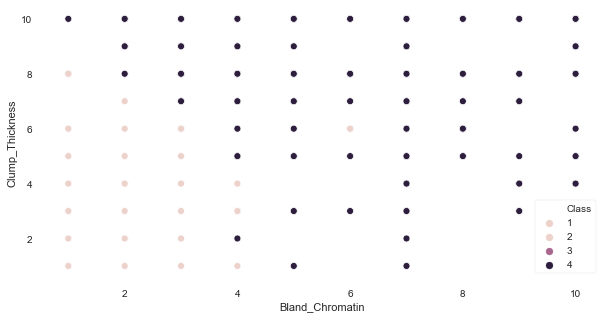

In [108]:
Y_pred_knn = knn.predict(X_test)
sns.scatterplot( x='Bland_Chromatin',  y='Clump_Thickness', hue='Class', data=cancer_dt)


In [109]:
confusion_matrix(Y_test, Y_pred_knn)

array([[110,   2],
       [  2,  61]], dtype=int64)

In [110]:
print("KNN Classification Report:")
print(classification_report(Y_test, Y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       112
           4       0.97      0.97      0.97        63

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175



#### SVM (Support Vector Machine)
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In [111]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svm_algo = SVC(kernel = 'linear', random_state = 0)
svm_algo.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [112]:
Y_pred_svm = svm_algo.predict(X_test) #knn.predict(X_test)
print("SVM Classification Report:")
print(classification_report(Y_test, Y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97       112
           4       0.95      0.95      0.95        63

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175



In [113]:
confusion_matrix(Y_test, Y_pred_svm)

array([[109,   3],
       [  3,  60]], dtype=int64)

In [114]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [115]:
Y_pred_svc = classifier.predict(X_test)
print("SVC Classification Report:")
print(classification_report(Y_test, Y_pred_svc))

SVC Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.99      0.97       112
           4       0.98      0.90      0.94        63

    accuracy                           0.96       175
   macro avg       0.97      0.95      0.96       175
weighted avg       0.96      0.96      0.96       175



In [116]:
confusion_matrix(Y_test, Y_pred_svc)

array([[111,   1],
       [  6,  57]], dtype=int64)

#### Gaussian Naive Bayes
__Naive Bayes__ is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.

In [117]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [118]:
def get_predictions(clf, X_train, Y_train, X_test):
    clf = clf       # create classifier    
    clf.fit(X_train,Y_train)   # fit it to training data    
    Y_pred = clf.predict(X_test)  # predict using test data
    Y_pred_prob = clf.predict_proba(X_test)  # Compute predicted probabilities: y_pred_prob
    train_pred = clf.predict(X_train)   #for fun: train-set predictions
    print('train-set confusion matrix:\n', confusion_matrix(Y_train,train_pred)) 
    return Y_pred, Y_pred_prob

In [119]:
Y_pred, Y_pred_prob = get_predictions(GaussianNB(), X_train, Y_train, X_test)

train-set confusion matrix:
 [[335  11]
 [  1 177]]


In [120]:
Y_pred_GNB = GNB.predict(X_train)
print(Y_pred_GNB)

[4 2 4 4 2 4 4 4 2 2 4 4 2 4 4 4 2 4 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 4
 4 2 4 4 4 2 4 2 2 4 2 2 2 2 2 2 2 4 2 4 2 2 4 2 4 2 4 2 4 2 2 4 2 2 2 2 2
 2 2 2 2 2 4 4 4 2 4 2 4 2 4 2 4 2 2 4 2 4 2 2 2 4 2 4 4 2 2 2 4 4 4 4 2 4
 2 2 2 4 4 4 2 2 4 2 4 2 4 4 2 4 2 4 2 2 2 2 2 4 4 2 2 4 2 4 2 4 4 2 4 4 2
 4 2 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 4 4 4 4 2 4 2 2 2 2 2 4 4 2 4 4 4 2
 2 2 4 2 4 4 2 4 2 2 2 2 2 4 2 4 2 2 4 4 2 2 2 4 4 4 2 2 2 2 2 2 4 2 2 2 2
 2 2 2 2 2 4 4 4 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 2 2 2 4 4 2 4 2 2 2 2 4 2 4
 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 2 4 2 2 2 2 2 4 4 2 2 4 2 2 4 4 2 4
 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 4 4 2 2 2 2
 2 4 4 2 2 4 2 2 2 2 4 2 2 4 4 2 2 4 2 2 2 4 2 2 4 2 4 2 2 4 4 4 2 2 2 4 2
 2 2 2 4 2 2 2 2 4 2 4 2 4 4 2 2 2 4 4 4 2 2 2 2 4 4 2 4 2 4 2 4 2 2 4 2 2
 2 2 4 2 4 2 2 2 4 4 4 4 4 2 2 2 4 4 4 4 4 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2
 2 2 2 2 4 4 2 2 4 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 4 2
 4 4 4 2 4 2 2 4 2 2 2 2 

In [121]:
print('GaussianNB test-set confusion matrix:\n', confusion_matrix(Y_test,Y_pred)) 

GaussianNB test-set confusion matrix:
 [[109   3]
 [  1  62]]


In [122]:
print("GaussianNB Classificatio Report:")
print(classification_report(Y_test, Y_pred))

GaussianNB Classificatio Report:
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       112
           4       0.95      0.98      0.97        63

    accuracy                           0.98       175
   macro avg       0.97      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175



<a id=section7></a>
## 7.Conclusion
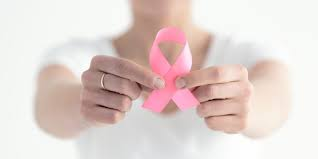

From the Exploratory Data Analysis, we could generate insight from the data. How each of the features relates to the target. 

Also, I have implemented PCA, K Nearest Neighbor, Support Vector Machines and Naïve Bayes for Breast Cancer Dataset. Dataset was very clean so data conversion or sanitisation was not needed. Among the 4 models Gaussian Naive Bayes algorithms has given the best result for dataset.